# 素数判定あれこれ

In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import *
from decimal import *
getcontext()
import random

## 素朴な素数判定

In [2]:
def is_prime(num):
    for k in range(2, int(math.sqrt(num))+1):
        if num%k == 0:
            return False
            break
    else: return True

In [3]:
def fermat(num):
    num = abs(num)
    if num == 2:
        return True
    elif num < 2 or num%2 == 0:
        return False
    else:
        return pow(2, num-1, num) == 1

In [4]:
fermat((2**20)*13+1)

True

## ミラー・ラビン法

In [5]:
def miller_rabin(k,init):
    num = (2**k)*init+1
    a = random.randrange(num-2)+1
    if pow(a, init, num) ==1: #(a**init)%num == 1:
        return True
    else:
        for r in range(k):
            b = (2**r)*init
            if pow(a, b, num) == num-1: #(a**b)%num == num-1:
                return True
                break
        else: 
            return False

In [6]:
k=20
init=13
num = (2**k)*init+1
print(num)

print(miller_rabin(k,init),is_prime(num))

13631489
True True


In [ ]:
init=13
%timeit [is_prime((2**k)*init+1) for k in range(1,100)]
%timeit [fermat((2**k)*init+1) for k in range(1,100)]
%timeit [miller_rabin(k,init) for k in range(1,100)]

# 大竹先生の問題

任意の奇素数 $p$ に対し、$p-1$ は偶数であり、$k \in \mathbb{N}$ と奇数 $M$ が存在して、
$$ p-1 = 2^{k}M $$
と分解される。

この逆を考える。
つまり、以下の問題を考える。

>**問題.** すべての奇数 $M$ に対し、$2^{k}*M + 1$ が素数となるような $k \in \mathbb{N}$ が存在するか?

https://ja.wikipedia.org/wiki/シェルピンスキー数

In [7]:
init = 2*80-1
N = 10**2

count=0
num = init
while not is_prime(num+1):
    count += 1
    if count > N:
        print("Count Limit")
        break
    num *= 2
else:
    print("{}=2^{}*{}+1".format(num+1, count, init))

10177=2^6*159+1


In [20]:
def get_k(odd, Limit = 10**3):
    count = 0
    num = odd
    while not fermat(num+1): #is_prime(num+1):
        count += 1
        if count > Limit:
            return -1
            break
        num *= 2
    else:
        return count

In [21]:
def get_k_mr(odd, Limit = 10**3):
    count = 0
    while not miller_rabin(count, odd):
        count += 1
        if count > Limit:
            return -1
            break
    else:
        return count

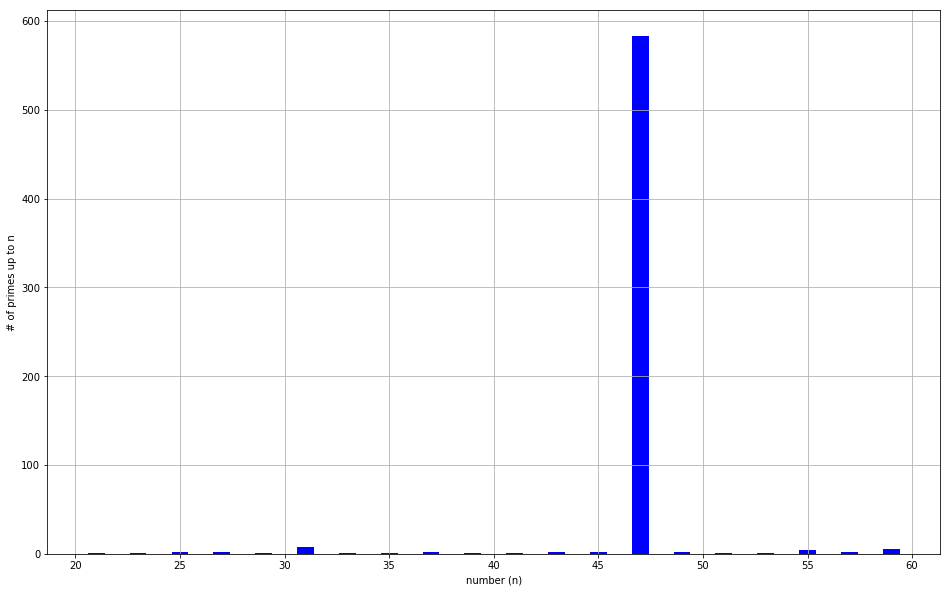

In [31]:
X = [2*k-1 for k in range(1,10**4)][10:30]
Y = [get_k_mr(odd) for odd in X] #[get_k(odd) for odd in X]

# Make the plot
plt.figure(figsize=(16,10))

ax = plt.subplot()
ax.grid()
ax.set(xlabel='number (n)', ylabel='# of primes up to n')

plt.bar(X, Y, color='blue')
#plt.xticks(X)
plt.show()

In [33]:
get_k_mr(47)

583

In [39]:
print((2**583)*47+1)
miller_rabin(583,47)

1487939695262196876907983166454197495251350196192890428923003345454869706240895712896623468784438158657419591298913094265537812046389415279164757669092989298186306341246574002177


True

In [51]:
def get_k_hybrid(odd, Limit = 10**3):
    count = 0
    num = odd
    while not fermat(num+1):
        count += 1
        if count > Limit:
            return -1
            break
        num *= 2
    else:
        if miller_rabin(count, odd):
            return count
        else:
            return (count, False)

In [55]:
for n in range(1,100):
    odd = 2*n+1
    print("{} |-> {}".format(odd, get_k_hybrid(odd)))

3 |-> 1
5 |-> 1
7 |-> 2
9 |-> 1
11 |-> 1
13 |-> 2
15 |-> 1
17 |-> 3
19 |-> 6
21 |-> 1
23 |-> 1
25 |-> 2
27 |-> 2
29 |-> 1
31 |-> 8
33 |-> 1
35 |-> 1
37 |-> 2
39 |-> 1
41 |-> 1
43 |-> 2
45 |-> 2
47 |-> 583
49 |-> 2
51 |-> 1
53 |-> 1
55 |-> 4
57 |-> 2
59 |-> 5
61 |-> 4
63 |-> 1
65 |-> 1
67 |-> 2
69 |-> 1
71 |-> 3
73 |-> 2
75 |-> 1
77 |-> 3
79 |-> 2
81 |-> 1
83 |-> 1
85 |-> (2, False)
87 |-> 2
89 |-> 1
91 |-> 8
93 |-> 2
95 |-> 1
97 |-> 2
99 |-> 1
101 |-> 3
103 |-> 16
105 |-> 1
107 |-> 3
109 |-> 6
111 |-> 1
113 |-> 1
115 |-> 2
117 |-> 3
119 |-> 1
121 |-> 8
123 |-> 6
125 |-> 1
127 |-> 2
129 |-> 3
131 |-> 1
133 |-> 4
135 |-> 1
137 |-> 3
139 |-> 2
141 |-> 1
143 |-> 53
145 |-> 6
147 |-> 8
149 |-> 3
151 |-> 4
153 |-> 1
155 |-> 1
157 |-> 8
159 |-> 6
161 |-> (2, False)
163 |-> 2
165 |-> 1
167 |-> 7
169 |-> 2
171 |-> 8
173 |-> 1
175 |-> 2
177 |-> 2
179 |-> 1
181 |-> 4
183 |-> 1
185 |-> 3
187 |-> 6
189 |-> 1
191 |-> 1
193 |-> 2
195 |-> 4
197 |-> 15
199 |-> 2
